# <font color='red'>Clustering Assignment</font>

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
	
4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ 
where N= number of clusters 
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

<br>

In [1]:
!pip install networkx==2.3

  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1555997 sha256=d29ad5abb9cbcba837c835983e851c1a7ce69c068af13168e2dcdd2bbc925a7d
  Stored in directory: c:\users\nhegde163036\appdata\local\pip\cache\wheels\ff\62\9e\0ed2d25fd4f5761e2d19568cda0c32716556dfa682e65ecf64
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.4
    Uninstalling networkx-2.4:
      Successfully uninstalled networkx-2.4


In [1]:
!pip install stellargraph

  Using cached stellargraph-1.2.1-py3-none-any.whl (435 kB)
  Using cached tensorflow-2.5.0-cp38-cp38-win_amd64.whl (422.6 MB)


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\NHegde163036\Anaconda3\lib\site-packages\pip\_internal\req\req_install.py", line 430, in check_if_exists
    self.satisfied_by = pkg_resources.get_distribution(str(no_marker))
  File "C:\Users\NHegde163036\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 481, in get_distribution
    dist = get_provider(dist)
  File "C:\Users\NHegde163036\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 357, in get_provider
    return working_set.find(moduleOrReq) or require(str(moduleOrReq))[0]
  File "C:\Users\NHegde163036\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 900, in require
    needed = self.resolve(parse_requirements(requirements))
  File "C:\Users\NHegde163036\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 791, in resolve
    raise VersionConflict(dist, req).with_context(dependent_req)
pip._vendor.pkg_resources.Contextual

In [2]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [3]:
data=pd.read_csv('movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [4]:
edges = [tuple(x) for x in data.values.tolist()]

In [5]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [6]:
A = list(nx.connected_component_subgraphs(B))[0]

In [7]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


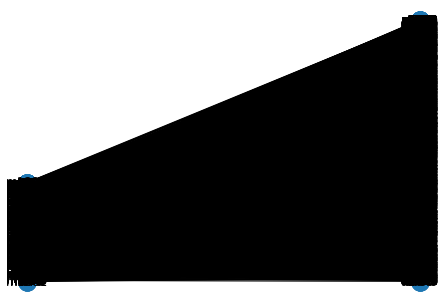

In [8]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [9]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [10]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [12]:
from gensim.models import Word2Vec
model = Word2Vec(walks, vector_size=128, window=5)

In [13]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [15]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index_to_key  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.node[node_id]['label'] for node_id in node_ids]

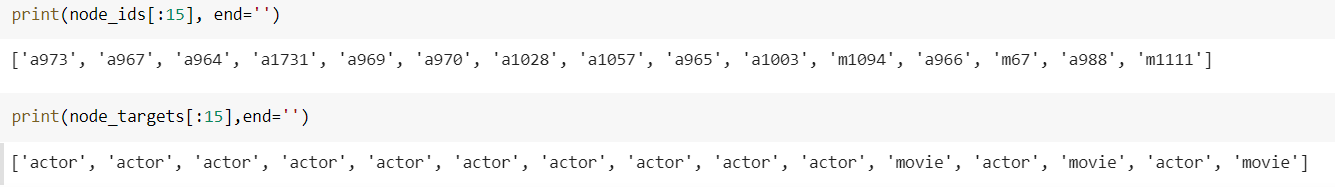

In [25]:
node_targets[node_targets == "movie"]

'actor'

In [31]:
[node_ids[k] for k in [i for i, x in enumerate(node_targets) if x == "movie"]]

['m1111',
 'm1094',
 'm67',
 'm1095',
 'm1100',
 'm1001',
 'm1114',
 'm1097',
 'm1096',
 'm26',
 'm376',
 'm1022',
 'm1112',
 'm126',
 'm1106',
 'm816',
 'm987',
 'm990',
 'm1232',
 'm1261',
 'm1272',
 'm157',
 'm148',
 'm1113',
 'm1000',
 'm32',
 'm1101',
 'm115',
 'm1220',
 'm964',
 'm121',
 'm122',
 'm914',
 'm1090',
 'm902',
 'm983',
 'm1024',
 'm155',
 'm25',
 'm1357',
 'm1045',
 'm154',
 'm165',
 'm915',
 'm1108',
 'm147',
 'm1116',
 'm150',
 'm1348',
 'm982',
 'm1011',
 'm1213',
 'm112',
 'm1023',
 'm453',
 'm1284',
 'm743',
 'm988',
 'm159',
 'm796',
 'm1013',
 'm377',
 'm1253',
 'm125',
 'm1098',
 'm1138',
 'm1092',
 'm942',
 'm616',
 'm662',
 'm918',
 'm973',
 'm1374',
 'm989',
 'm129',
 'm1093',
 'm551',
 'm1198',
 'm890',
 'm924',
 'm128',
 'm135',
 'm1225',
 'm1030',
 'm1212',
 'm1151',
 'm850',
 'm75',
 'm1263',
 'm215',
 'm851',
 'm947',
 'm577',
 'm145',
 'm282',
 'm430',
 'm1110',
 'm963',
 'm1185',
 'm1019',
 'm30',
 'm847',
 'm986',
 'm340',
 'm1172',
 'm1372',
 'm10

In [32]:
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
    actor_nodes,movie_nodes= [node_ids[k] for k in [i for i, x in enumerate(node_targets) if x == "actor"]], [node_ids[k] for k in [i for i, x in enumerate(node_targets) if x == "movie"]]
    actor_embeddings,movie_embeddings= [node_embeddings[k] for k in [i for i, x in enumerate(node_targets) if x == "actor"]], [node_embeddings[k] for k in [i for i, x in enumerate(node_targets) if x == "movie"]]
    # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
    # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
    # By using node_ids and node_targets, we can extract actor_nodes and movie nodes

    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings


In [34]:
actor_nodes,movie_nodes,actor_embeddings,movie_embeddings = data_split(node_ids,node_targets,node_embeddings)

<font color='cyan'>Grader function - 1</font>

In [35]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Grader function - 2</font>

In [36]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [40]:
def cost1(graph,N):
    '''In this function, we will calculate cost1'''
    largest_component = len(max(nx.connected_components(graph), key=len))
    total=len(graph.nodes())
    cost1=(largest_component/total)*(1/N)
    return cost1

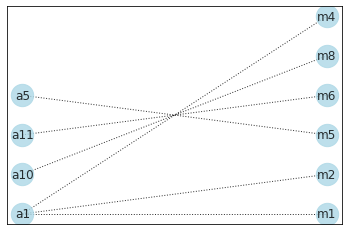

In [38]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

<font color='cyan'>Grader function - 3</font>

In [41]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
    return True
grader_cost1(graded_cost1)

True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [42]:
def cost2(graph,N):
    list_mnodes=[]
    for i in graph.nodes():
        if 'm' in i:
            list_mnodes.append(i)
    den=len(list_mnodes)
    num=graph.number_of_edges()
    cost2=num/den*(1/N)
    return cost2

<font color='cyan'>Grader function - 4</font>

In [43]:
graded_cost2=cost2(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

<font color='blue'>Grouping similar actors</font>

In [44]:
from tqdm import tqdm
from collections import defaultdict
costs=[]
for number_of_clusters in tqdm([3, 5, 10, 30, 50, 100, 200, 500]):
    clustering_algo = KMeans(n_clusters=number_of_clusters, random_state=0)
    clustering_algo.fit(actor_embeddings)
    l=(clustering_algo.labels_)
    actor_cluster=defaultdict(list)
    for j in range(number_of_clusters):
        for k in range(len(actor_nodes)):
            if l[k]==j:
                actor_cluster[j].append(actor_nodes[k])
    sum1=0
    sum2=0
    for i in range(number_of_clusters):
        subgraph = nx.Graph() 
        for m in (actor_cluster[i]):
            cluster_graph=nx.ego_graph(B,m,radius=3)
            subgraph.add_nodes_from(cluster_graph.nodes())
            subgraph.add_edges_from(cluster_graph.edges())
        sum1+=cost1(subgraph,1)
        sum2+=cost2(subgraph,1)    
    costs.append((sum1*sum2)/(number_of_clusters*number_of_clusters))

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [04:57<00:00, 37.18s/it]


In [46]:
d_dict=(list(zip(costs,[3, 5, 10, 30, 50, 100, 200, 500])))
print(d_dict)
d_dict.sort(key=lambda tup: tup[0],reverse=True)
print(d_dict)
print(d_dict[0][0])

[(6.786036731012896, 3), (5.769908829988221, 5), (4.974602163795445, 10), (3.54450590857304, 30), (3.2771395175810407, 50), (3.0660626509970865, 100), (2.637192712907566, 200), (1.9678312794801425, 500)]
[(6.786036731012896, 3), (5.769908829988221, 5), (4.974602163795445, 10), (3.54450590857304, 30), (3.2771395175810407, 50), (3.0660626509970865, 100), (2.637192712907566, 200), (1.9678312794801425, 500)]
6.786036731012896


In [47]:
kmeans = KMeans(n_clusters=d_dict[0][1], random_state=0)
kmeans.fit(actor_embeddings)
node_targets=(kmeans.labels_)

In [48]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(actor_embeddings)

<font color='blue'>Displaying similar actor clusters</font>

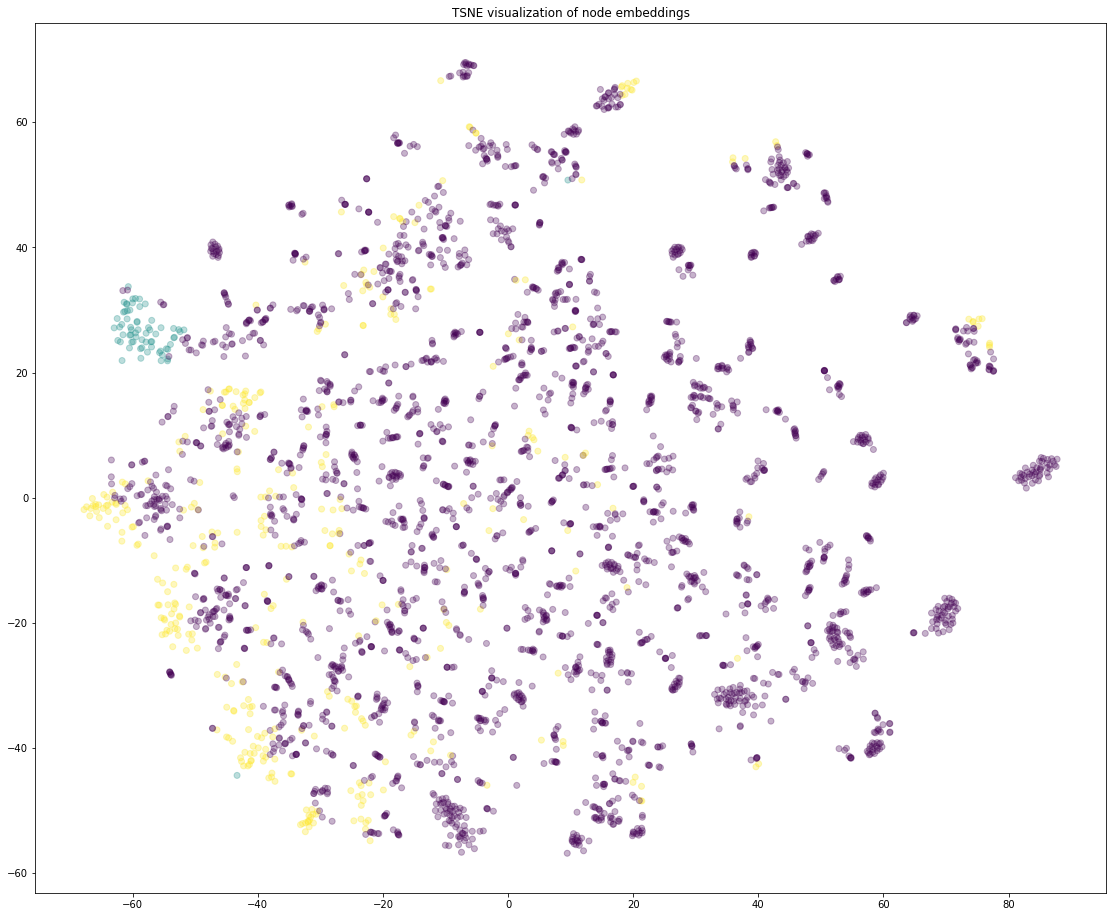

In [49]:
import numpy as np
# draw the points

labels = { l: i for i, l in enumerate(np.unique(node_targets))}
colours = [ labels[target] for target in node_targets]

plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0], 
            node_embeddings_2d[:,1], 
            c=colours, alpha=0.3)
plt.title('{} visualization of node embeddings'.format(transform.__name__))

plt.show()

<font color='blue'>Grouping similar movies</font>

In [50]:
from tqdm import tqdm
from collections import defaultdict
costs=[]
for number_of_clusters in tqdm([3, 5, 10, 30, 50, 100, 200, 500]):
    clustering_algo = KMeans(n_clusters=number_of_clusters, random_state=0)
    clustering_algo.fit(movie_embeddings)
    l=(clustering_algo.labels_)
    movie_cluster=defaultdict(list)
    for j in range(number_of_clusters):
        for k in range(len(movie_nodes)):
            if l[k]==j:
                movie_cluster[j].append(movie_nodes[k])
    sum1=0
    sum2=0
    for i in range(number_of_clusters):
        subgraph = nx.Graph() 
        for m in (movie_cluster[i]):
            cluster_graph=nx.ego_graph(B,m,radius=3)
            subgraph.add_nodes_from(cluster_graph.nodes())
            subgraph.add_edges_from(cluster_graph.edges())
        sum1+=cost1(subgraph,1)
        sum2+=cost2(subgraph,1)    
    costs.append((sum1*sum2)/(number_of_clusters*number_of_clusters))

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [07:00<00:00, 52.59s/it]


In [51]:
d_dict=(list(zip(costs,[3, 5, 10, 30, 50, 100, 200, 500])))
print(d_dict)
d_dict.sort(key=lambda tup: tup[0],reverse=True)
print(d_dict)
print(d_dict[0][0])

[(7.881251645947931, 3), (8.101103506900742, 5), (8.529411203458663, 10), (9.641293427305225, 30), (9.880465206028822, 50), (9.924973316967103, 100), (9.693676874287739, 200), (9.080628612338307, 500)]
[(9.924973316967103, 100), (9.880465206028822, 50), (9.693676874287739, 200), (9.641293427305225, 30), (9.080628612338307, 500), (8.529411203458663, 10), (8.101103506900742, 5), (7.881251645947931, 3)]
9.924973316967103


In [52]:
kmeans = KMeans(n_clusters=d_dict[0][1], random_state=0)
kmeans.fit(movie_embeddings)
node_targets=(kmeans.labels_)

In [53]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(movie_embeddings)

<font color='blue'>Displaying similar movie clusters</font>

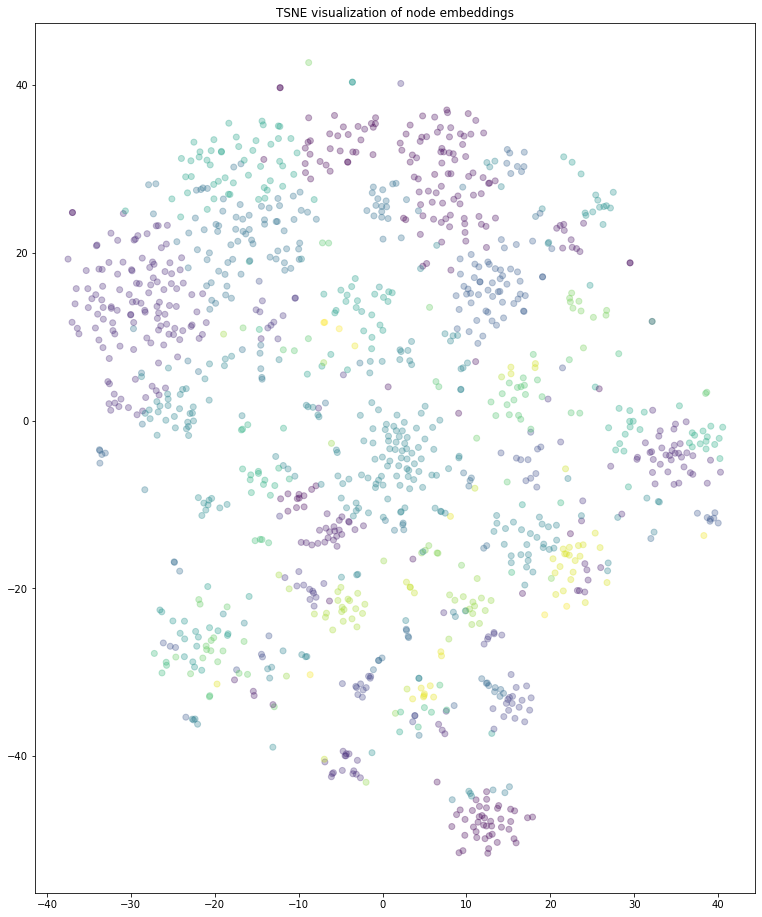

In [54]:
import numpy as np
# draw the points

labels = { l: i for i, l in enumerate(np.unique(node_targets))}
colours = [ labels[target] for target in node_targets]

plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0], 
            node_embeddings_2d[:,1], 
            c=colours, alpha=0.3)
plt.title('{} visualization of node embeddings'.format(transform.__name__))

plt.show()